# Exercises: Means 
By Christopher van Hoecke and Max Margenot

## Lecture Link :
https://www.quantopian.com/lectures/means

### IMPORTANT NOTE: 
This lecture corresponds to the Means lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

----

## Key Concepts

In [29]:
import yfinance as yf
import pandas as pd
import scipy.stats as stats
import numpy as np

In [28]:
# Useful Functions
def mode(l):
    # Count the number of times each element appears in the list
    counts = {}
    for e in l:
        if e in counts:
            counts[e] += 1
        else:
            counts[e] = 1
            
    # Return the elements that appear the most times
    maxcount = 0
    modes = {}
    for (key, value) in counts.items():
        if value > maxcount:
            maxcount = value
            modes = {key}
        elif value == maxcount:
            modes.add(key)
            
    if maxcount > 1 or len(l) == 1:
        return list(modes)
    return 'No mode'

#### Data:

In [7]:
l=[]
for x in range(1,100):
    x=np.random.randint(1,100)
    l.append(x)
    
print(l)

[32, 20, 10, 85, 40, 88, 52, 74, 89, 5, 95, 61, 13, 62, 19, 88, 19, 55, 3, 21, 1, 41, 44, 75, 65, 24, 23, 88, 96, 50, 32, 5, 59, 78, 32, 58, 88, 62, 37, 75, 96, 92, 7, 73, 24, 79, 2, 88, 44, 94, 78, 65, 25, 10, 22, 8, 20, 51, 82, 92, 90, 42, 60, 11, 49, 44, 5, 92, 38, 8, 58, 57, 47, 90, 92, 29, 61, 92, 81, 25, 56, 3, 9, 32, 13, 74, 59, 44, 80, 12, 17, 3, 64, 18, 36, 30, 38, 56, 3]


----

# Exercise 1 : Arithmetic mean.
## a. Mean of random data set.
Find the mean of the randomly generated data set `l`. 

In [30]:
## Your code goes here       
mean = np.mean(l)
print('La media del conjunto es: ', mean)

La media del conjunto es:  47.81818181818182


## b. Mean of returns
Find the mean of the returns of Iteris Inc. (ITI).

In [32]:
def get_pricing(ticker, fields='price', start_date='2005-01-01', end_date='2010-01-01'):
    """
    Función para obtener los precios de un activo entre dos fechas usando yfinance.
    
    Args:
        ticker (str): El símbolo del activo (por ejemplo, 'AAPL').
        fields (str): El campo que deseas obtener, como 'price'.
        start_date (str): La fecha de inicio en formato 'YYYY-MM-DD'.
        end_date (str): La fecha de fin en formato 'YYYY-MM-DD'.
    
    Returns:
        pd.Series or pd.DataFrame: Los precios solicitados o los datos completos si el campo es desconocido.
    """
    # Descargar los datos de Yahoo Finance
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Mapear el campo 'price' a la columna 'Adj Close' de yfinance
    if fields == 'price':
        return data['Adj Close']
    else:
        # Si se solicita un campo no implementado, devolver todo el DataFrame
        return data



In [45]:
price = get_pricing('ITI', fields='price', start_date='2005-01-01', end_date='2010-01-01')
returns = price.pct_change()[1:]
print("Media de los retornos:" , np.mean(returns))

[*********************100%%**********************]  1 of 1 completed

Media de los retornos: -4.482282705837242e-05


---

# Exercise 2 : Median
## a. Median of random data set
Find the median of the randomly generated data set `l`.

In [46]:
## Your code goes here   
print("Mediana del conjunto: ", np.median(l))

Mediana del conjunto:  47.0


## b. Median of the returns.
Find the median associated with the returns of Bank of America Corp. (BAC).

In [47]:
price = get_pricing('BAC', fields='open_price', start_date='2005-01-01', end_date='2010-01-01')
returns = price.pct_change()[1:]

## Your code goes here
print("Mediana de los retornos: ", np.median(returns))

[*********************100%%**********************]  1 of 1 completed

Mediana de los retornos:  -0.0004460636802688378


----

# Exercise 3 : Mode
## a. Mode of a random data set. 
Find the mode of the random generated data set `l`.

In [50]:
## Your code goes here
print("Moda del conjunto de datos: ", stats.mode(l))

Moda del conjunto de datos:  [88, 92]


## b. Mode of the returns. 
Find the mode associated with the returns of Goldman Sachs Corp. (GS). *Recall with returns, there may not be any values that appear more than once.*

In [62]:
start = '2014-01-01'
end = '2015-01-01'
pricing = get_pricing('GS', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

## Your code goes here
# esto no tiene sentido porque son numeros reales -> print("Moda de los retonos: ", stats.mode(returns))
hist, bins = np.histogram(returns, 20)
maxfreq = max(hist)

print('Mode of bins:', [(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq])

[*********************100%%**********************]  1 of 1 completed

Mode of bins: [(-0.0030383740000731185, 0.0001783257985697173), (0.0001783257985697173, 0.003395025597212553)]


----

# Exercise 4 : Geometric mean
## a. Geometric Mean of random data set.
Find the Geometric mean of the random generated data set.

¿Qué es la media geometrica?

La media geométrica es especialmente útil cuando se trabaja con tasas de crecimiento, rendimientos financieros, porcentajes o cuando los valores están relacionados de forma multiplicativa. Esto es frecuente en situaciones donde el cambio es relativo o en proporciones, como el crecimiento compuesto, tasas de retorno y cambios en porcentajes.

Ejemplo práctico con rendimientos financieros
Supongamos que tienes una inversión que tuvo diferentes rendimientos en tres años consecutivos:

- Año 1: +50% (1.50 multiplicativo)
- Año 2: -30% (0.70 multiplicativo)
- Año 3: +20% (1.20 multiplicativo)

Cálculo de la media geométrica en el ejemplo
Valores multiplicativos: Primero, convertimos los porcentajes en factores multiplicativos:

Año 1: +50% → 1.50
Año 2: -30% → 0.70
Año 3: +20% → 1.20

La media geométrica es aproximadamente 1.080, lo que significa que el rendimiento anual promedio compuesto fue del 8%. Este 8% refleja mejor el rendimiento real de la inversión, ya que toma en cuenta la naturaleza multiplicativa de los rendimientos.  En el ejemplo, la media aritmética daba un rendimiento promedio del 13%, pero esto no es correcto porque los rendimientos de una inversión no se suman directamente. Si hubieras usado este 13% para predecir el crecimiento final, habrías sobreestimado el rendimiento.

In [63]:
## Your code goes here
print("Media geométrica del conjunto: ", stats.gmean(l))

Media geométrica del conjunto:  33.56222831651789


## b. Geometric Mean of returns. 
Find the Geometric Mean of the price of Citi bank (C) for the last 5 years. 

In [70]:
price = get_pricing('C', fields='open_price', start_date='2005-01-01', end_date='2010-01-01')
# print(price)
## Your code goes here
print("Media geométrica del conjunto: ", stats.gmean(price['Open']))

[*********************100%%**********************]  1 of 1 completed

Media geométrica del conjunto:  232.5769756281446


---

# Exercise 5 : Harmonic mean.

La media armónica es más útil cuando los valores son tasas o razones, y especialmente cuando queremos calcular el promedio de magnitudes que tienen una relación inversa entre sí. Se utiliza, por ejemplo, para promediar velocidades, ratios financieros o tasas de cambio.

Imagina que un inversor compra acciones de una empresa a diferentes precios en diferentes momentos. Supón que el inversor compra:

- 10 acciones a $100 cada una.
- 20 acciones a $80 cada una.
- 30 acciones a $60 cada una.

En lugar de calcular la media aritmética del precio de compra, la media armónica es más adecuada porque los precios están en relación inversa a la cantidad de acciones compradas (es decir, cuando el precio baja, el inversor compra más acciones).

El precio promedio por acción usando la media armónica es de aproximadamente $76.61. Esto es más realista que la media aritmética porque refleja el hecho de que el inversor compró más acciones cuando el precio era más bajo.

## a. Harmonic Mean of random data set. 
Find the harmonic mean of the randomly generated data set `l`.

In [71]:
## Your code goes here
print("La media armónica es de: ", stats.hmean(l)) 

La media armónica es de:  15.817606338909583


## b. Harmonic Mean of stock returns.
Find the Harmonic Mean of the financial ETF (XLF) over the last 2 years.

Esto para mi no tiene mucho sentido, ya que la media armónica funciona mejor para tasas de cambio o ratios, y en ese caso lo que contiene el df son precios

In [74]:
precios = get_pricing('XLF', fields='open_price', start_date='2005-01-01', end_date='2010-01-01')

## Your code goes here
print("La media armónica es de: ", stats.hmean(precios['Close'])) 

[*********************100%%**********************]  1 of 1 completed

La media armónica es de:  17.736444292083462


----

# Exercise 6 : Skewness and why it matters.
Skewness in a probability distribution is the measure of asymmetry. Negative skew has fewer low values and a longer left tail, whereas positive skew has fewer high values and a longer right tail.
In asset pricing, skewness is an important information, naimly in risk assessment. Knowledge that the market has a 60% chance of going down and a 40% chance of going up apears helpfull but only if we know the market is obeying a normal distrubtuion. If we are told that the market will go up 2% but down 18%, we can see how skewness would give us better information.

https://images.deepai.org/glossary-terms/22fed5758fe947e0b4962896d8739d5c/skewness.jpg

Skewness (o asimetría) es una medida estadística que indica la simetría o falta de simetría en la distribución de un conjunto de datos. Más específicamente, la asimetría mide hasta qué punto una distribución se desvía de una distribución simétrica (como la distribución normal, que es perfectamente simétrica).

Asimetría positiva (o sesgo a la derecha):

- La cola derecha de la distribución es más larga o está más extendida.
- Los valores extremos (outliers) se encuentran en la parte derecha de la distribución.
- La mayoría de los datos se concentran en los valores más bajos, y la cola derecha se alarga hacia valores más altos.

Un ejemplo común es una distribución de ingresos, donde la mayoría de las personas tienen ingresos más bajos y hay un pequeño número de personas con ingresos muy altos (los outliers).

Asimetría negativa (o sesgo a la izquierda):

- La cola izquierda de la distribución es más larga o está más extendida.
- Los valores extremos se encuentran en la parte izquierda de la distribución.
- La mayoría de los datos se concentran en los valores más altos, y la cola izquierda se alarga hacia valores más bajos.

Un ejemplo podría ser el tiempo de vida útil de productos que generalmente duran mucho tiempo, pero hay algunos que fallan prematuramente.

Asimetría nula (simetría):

- La distribución es simétrica, y tanto la cola derecha como la cola izquierda tienen la misma forma.
- La distribución normal es un ejemplo típico de una distribución simétrica.

Determine if the returns of SPY from 2010 to 2017 is positivly or negativly skewed. 
*Recall a data set is positivly skewed if the mode is smaller than the median, which is smaller than the mean. A data set is negativly skewed in the event of the reverse (i.e: the mean is greater than the median, which is greater than the mode)*


In [79]:
price = get_pricing('SPY', fields='volume', start_date='2010-01-01', end_date='2017-01-01')
returns = price.pct_change()[1:]

# Calculate Mean, Median and Mode. 
mean = np.mean(returns)
median = np.median(returns)
mode = stats.mode(returns)[0][0]

# Setting parameters and print skewness outcome. 
if mode < median < mean:
    print('The returns are positivly skewed.')
if mean<median<mode: 
    print('The returns are negativly skewed.')
if mean == median == mode:
    print('There is no Skewness: the returns are symetricaly distributed')

## Your code goes here
print("Skweness: ", stats.skew(returns))

[*********************100%%**********************]  1 of 1 completed

The returns are positivly skewed.
Skweness:  [-0.41003282 -0.35547655 -0.82376177 -0.3608963  -0.37354476  1.45918698]


We can clearly see positive skewing from the histogram of the returns. We see fewer higher values and a longer right tail.
Plot the histograms of the returns now.

Text(0.5, 1.0, 'Histogram of Returns')

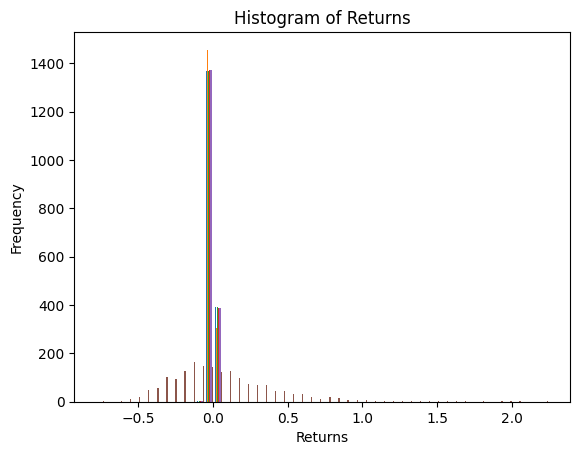

In [81]:
## Your code here
import matplotlib.pyplot as plt
plt.hist(returns, bins = 50)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Returns')

---

Congratulations on completing the Means exercises!

As you learn more about writing trading algorithms and the Quantopian platform, be sure to check out the daily [Quantopian Contest](https://www.quantopian.com/contest), in which you can compete for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*